In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
digits_mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()

In [11]:
X_train = train_images / 255.0
X_test = test_images / 255.0
y_train = train_labels
y_test = test_labels

In [4]:
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [5]:
model = keras.Sequential([
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [8]:
callbacks = myCallback()

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs = 50, callbacks = [callbacks])

Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2024 - accuracy: 0.9400
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0806 - accuracy: 0.9758
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0525 - accuracy: 0.9835
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0371 - accuracy: 0.9879
Epoch 5/50
1872/1875 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9907
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0287 - accuracy: 0.9907


In [13]:
model.save("handwriting_model.h5")
print("Saved Model to Disk")

Saved Model to Disk


In [14]:
model = load_model("handwriting_model.h5")
y_hat = model.predict(test_images)

In [15]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 14.1302 - accuracy: 0.9796


[14.130195617675781, 0.9796000123023987]

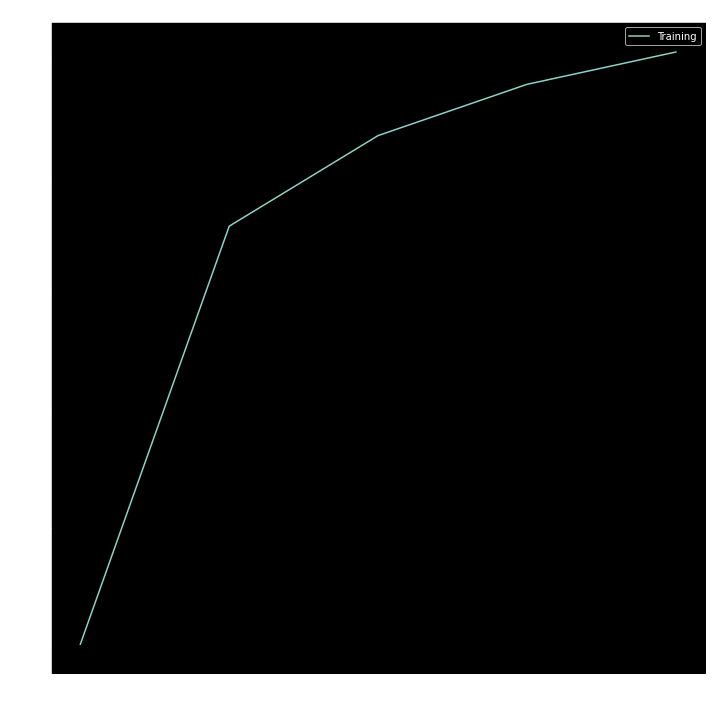

In [16]:
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.tight_layout()
plt.show()

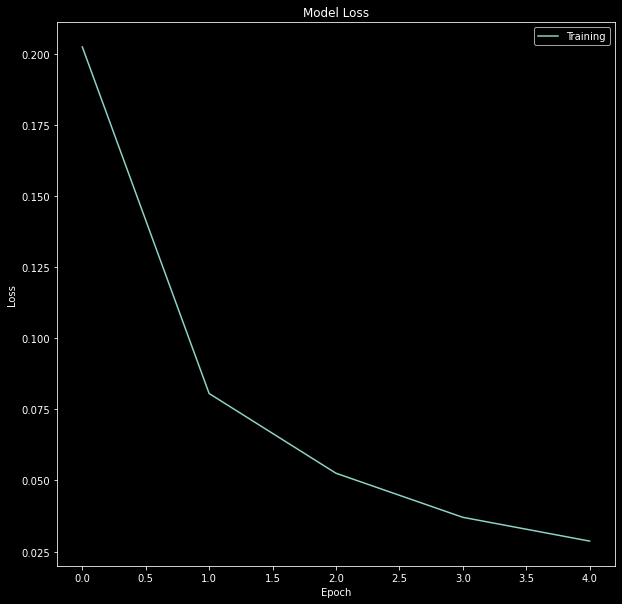

In [17]:
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.show()